**Train Naive Bayes and decision tree models and gain insights about what the models have learned. Compare the classification accuracy of NBC vs Decision Tree model.


Ans: **
Training has been done in code file and can be seen in the output .
 Naive Bayes Classifier: In a credit card fraud detection scenario, the Naive Bayes classifier predicts whether a transaction is fraudulent or not based on features like transaction amount, location, time, gender, car ownership, property ownership, type of income, education level, marital status, housing type, and occupation type.
Explanation:
1. Conditional Independence: Naive Bayes assumes that the likelihood of observing each feature (e.g., transaction amount, gender) given the class label (fraudulent or not) is independent of other features.
2. Bayes' Theorem: It calculates the probability of a transaction being fraudulent given the observed features using Bayes' theorem. For example, it estimates the probability of a transaction being fraudulent given its amount, gender, location, etc.
3. Decision Rule: The classifier assigns the transaction to the class (fraudulent or not) with the highest posterior probability. If the calculated probability of a transaction being fraudulent is higher than a predefined threshold, it's classified as fraudulent.


Decision Tree Classifier: In the credit card fraud detection scenario, the Decision Tree classifier creates a tree-like model to identify patterns in the transaction data indicative of fraud.
Explanation:
1. Recursive Partitioning: The Decision Tree recursively splits the dataset into subsets based on features like transaction amount, gender, car ownership, etc., aiming to maximize the purity of each subset with respect to the class label (fraudulent or not).
2. Decision Nodes: At each internal node of the tree, the algorithm selects the feature and threshold that best separates the transactions into purest subsets in terms of fraudulence.
3. Leaf Nodes: The process continues until a stopping criterion is met, and terminal nodes (leaf nodes) are assigned the majority class label of the transactions in that node.


- Feature Importance: Decision Tree reveals which features (e.g., high transaction amount, unusual gender-income combinations) are most informative for detecting fraud.
  - Conditional Probabilities: Naive Bayes provides the probability of a transaction being fraudulent given its features, aiding in fraud detection.
- Model Complexity: Decision Tree's depth and structure reflect the complexity of fraud detection rules, while Naive Bayes offers simplicity in classification.
- Interpretability: Decision Tree provides clear decision rules for identifying fraud patterns, whereas Naive Bayes offers interpretability through conditional probabilities.
After training the datasets  below are my observations with graph:
  → Comparison of Accuracies: The graph above compares the accuracies of the Gaussian Naive Bayes, Categorical Naive Bayes, and Decision Tree classifiers. By which Categorical Naive Bayes has the highest accuracy
→ Model Comparison: Among the three classifiers, Decision Tree achieves the highest accuracy, followed by Categorical Naive Bayes, and then Gaussian Naive Bayes.
→ Considerations: As before, it's essential to consider interpretability, computational complexity, and dataset characteristics when choosing the appropriate model.
Below is the graphical representation :




In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Define the file paths
file_path1 = '/content/drive/My Drive/Pujitha_kallu_PRDM/Assignment-2/Credit_card.csv'
file_path2 = '/content/drive/My Drive/Pujitha_kallu_PRDM/Assignment-2/Credit_card_label.csv'

# Read the CSV files into DataFrames
credit_card_data = pd.read_csv(file_path1)
credit_card_label = pd.read_csv(file_path2)

print("Columns in credit_card_data:", credit_card_data.columns)
print("Columns in credit_card_label:", credit_card_label.columns)



Columns in credit_card_data: Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')
Columns in credit_card_label: Index(['Ind_ID', 'label'], dtype='object')


In [128]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import re
# Merge the datasets on a common key (if applicable)
merged_df = pd.merge(credit_card_data, credit_card_label, on='Ind_ID')

# Drop unnecessary columns (if needed)
merged_df = merged_df.drop(columns=['Ind_ID'])

# Assuming 'label' is the target column and the rest are features
X = merged_df.drop(columns=['label'])
y = merged_df['label']


In [129]:
X.fillna(value=np.nan,inplace=True)

In [130]:
from sklearn.preprocessing import OneHotEncoder


In [131]:
categorical_cols = X.select_dtypes(include=['object']).columns
#object type will corresponds to categorical columns

In [132]:
# Label Encode categorical columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    X[col] = label_encoders[col].fit_transform(X[col])

In [133]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import CategoricalNB, MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming `X` and `y` are your data and target variables, and `categorical_cols` are the columns to be used
X_encoded = X[categorical_cols]
print(X_encoded)

# Train and evaluate Categorical Naive Bayes Classifier
cnb_classifier = CategoricalNB()
cnb_classifier.fit(X_encoded, y)
y_pred_cnb = cnb_classifier.predict(X_encoded)
accuracy_cnb = accuracy_score(y, y_pred_cnb)
print("Accuracy of Categorical Naive Bayes:", accuracy_cnb)

# One-Hot Encode categorical columns for Multinomial Naive Bayes
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_onehot = encoder.fit_transform(X[categorical_cols])

# Train and evaluate Multinomial Naive Bayes Classifier
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_onehot, y)
y_pred_mnb = mnb_classifier.predict(X_onehot)
accuracy_mnb = accuracy_score(y, y_pred_mnb)
print("Accuracy of Multinomial Naive Bayes :", accuracy_mnb)


      GENDER  Car_Owner  Propert_Owner  Type_Income  EDUCATION  \
0          1          1              1            1          1   
1          0          1              0            0          1   
2          0          1              0            0          1   
3          0          1              0            0          1   
4          0          1              0            0          1   
...      ...        ...            ...          ...        ...   
1543       0          0              1            0          1   
1544       0          0              0            0          2   
1545       1          1              1            3          1   
1546       1          1              0            3          4   
1547       0          1              1            3          1   

      Marital_status  Housing_type  Type_Occupation  
0                  1             1               18  
1                  1             1               18  
2                  1             1           

From above code:
The code selects only the categorical columns from the dataset X and assigns them to X_encoded. These columns are the predictors for the Naive Bayes classifiers.


Training Categorical Naive Bayes Classifier (CNB): The code initializes a CategoricalNB classifier and fits it to the encoded categorical predictors (X_encoded). Then, it makes predictions on the same dataset (X_encoded) and computes the accuracy of the classifier using the true labels y.


Training Multinomial Naive Bayes Classifier (MNB): The code initializes a MultinomialNB classifier and fits it to the encoded categorical predictors (X_encoded). Similar to the CNB classifier, it then makes predictions on the same dataset (X_encoded) and computes the accuracy.


Printing Results: Finally, the code prints the accuracies of both classifiers on the entire dataset.






In [134]:
from sklearn.metrics import classification_report
print("Classification Report for Categorical Naive Bayes:")
print(classification_report(y, y_pred_cnb,zero_division=0))

print("Classification Report for Multinomial Naive Bayes:")
print(classification_report(y, y_pred_mnb,zero_division=0))

Classification Report for Categorical Naive Bayes:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1373
           1       0.80      0.07      0.13       175

    accuracy                           0.89      1548
   macro avg       0.85      0.53      0.53      1548
weighted avg       0.88      0.89      0.85      1548

Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1373
           1       0.80      0.07      0.13       175

    accuracy                           0.89      1548
   macro avg       0.85      0.53      0.53      1548
weighted avg       0.88      0.89      0.85      1548



From above report, the Categorical Naive Bayes (CNB) and Multinomial Naive Bayes (MNB) classifiers using the `classification_report` function from the `sklearn.metrics` module. This function outputs key metrics including precision, recall, f1-score, and support for each class in the dataset. Precision measures the accuracy of positive predictions, recall indicates the model's ability to identify all actual positive cases, and the f1-score is the harmonic mean of precision and recall, providing a balanced measure of the classifier's performance. Support represents the actual number of occurrences of each class in the true labels. The reports also include overall accuracy, macro average, and weighted average metrics, which offer insights into the models' performances across all classes. These reports help compare the effectiveness of CNB and MNB classifiers, highlighting their strengths and areas for improvement by analyzing how well they predict each class and their overall prediction accuracy.




---


2. Output 4 significantly predictive features learned by the model. Report these
in your report, together with your reasoning or evidence that they are predictive. In this context, the term "feature" means a particular categorical variable taking on a particular value, e.g. Type Income being Pensioner. In the process you will need to figure out how to quantify how predictive a certain feature is. Document this in your report. **bold text**

The analysis of top features from the Multinomial Naive Bayes classifier sheds light on key factors influencing predictions in the dataset.

 Feature: Type_Occupation_IT staff : 3.094204037772011
 Reasoning: This feature has a high importance score, indicating that the presence of "IT staff" in the occupation type is a strong indicator of the class (fraudulent or not). This may be because IT staff might have distinct transaction patterns or risk profiles that the model has identified as significant.

 Occupations like IT staff, Security staff, Waiters/barmen staff, and Low-skill Laborers exhibit significant differences in their impact on predictions. For instance, IT staff stands out with the highest difference in log probability, indicating its strong influence on the prediction outcome. Similarly, other occupations show notable differences, suggesting their importance in determining predictions.


Feature: GENDER_nan: 2.688738929663846
Reasoning: The "GENDER_nan" feature suggests missing or unspecified gender information. The model finds this highly predictive, potentially because missing gender information correlates with certain types of transactions or fraud risk.

The presence of missing values (nan) in the gender field significantly affects predictions, as indicated by the substantial difference in log probability. The model distinguishes between male and female applicants, with both categories showing discernible differences. This underscores the significance of gender information in prediction accuracy.

Feature: Housing_type:

 Different categories of housing, such as Co-op apartment, Municipal apartment, and Office apartment, play a significant role in predictions. Co-op apartments, in particular, demonstrate a substantial impact on predictions compared to other housing types, highlighting the importance of housing type as a predictor.

Feature EDUCATION:The Lower secondary educational category shows a notable difference in log probability (1.2088), highlighting its significant impact on predictions. Additionally, educational levels such as Academic degree, Incomplete higher, and Higher education also demonstrate differences, suggesting that education level serves as a crucial predictor in the prediction process.


→ To quantify how predictive a certain feature is, we looked at the absolute difference in the log probabilities of the features between the two classes. Features with higher differences are considered more predictive because they show a stronger distinction in the likelihood of occurrence between fraudulent and non-fraudulent transactions.
→ By analyzing the conditional probabilities and their differences, we identified the most predictive features. These features provide insights into patterns and factors that are significant for distinguishing between fraudulent and non-fraudulent transactions. Understanding these features helps in improving the model and potentially guiding further investigation into fraud detection mechanisms.





Educational levels, including Lower secondary, Academic degree, Incomplete higher, and Higher education, exhibit varying degrees of influence on predictions. Lower secondary education stands out with a notable difference in log probability, indicating its significant impact on predictions. This suggests that education level serves as a crucial determinant in predicting outcomes.




In [159]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

# Get the conditional probabilities learned by the model
log_probs = mnb_classifier.feature_log_prob_

# Calculate the absolute difference in conditional probabilities between classes
diff_probs = abs(log_probs[0] - log_probs[1])

# Get the indices of the top N features with the highest differences
top_feature_indices = diff_probs.argsort()[-4:][::-1]

# Get the feature names corresponding to the top indices
feature_names = encoder.get_feature_names_out(categorical_cols)

# Create a dictionary to map feature indices to categorical names
feature_categories = {
    0: "Category_1",
    1: "Category_2",
    # Add more mappings as needed
}

# Print the top features and their importance scores
for idx, feature_idx in enumerate(top_feature_indices):
    feature_name = feature_names[feature_idx]
    predictive_power = diff_probs[feature_idx]
    category_idx = int(feature_name.split('_')[-1])
    category_name = feature_categories.get(category_idx)
    print(f"Feature:  {feature_name}, Predictive Power: {predictive_power}")


Feature:  Type_Occupation_7, Predictive Power: 3.1232662314433703
Feature:  GENDER_2, Predictive Power: 2.7178011233352057
Feature:  Type_Occupation_16, Predictive Power: 1.331506762215315
Feature:  Housing_type_2, Predictive Power: 1.2202811271050908


In [158]:
# Apply one-hot encoding to categorical columns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.preprocessing import OneHotEncoder


uploaded = files.upload()

uploaded = files.upload()
parameters_df = pd.read_csv('Credit_card.csv')
labels_df = pd.read_csv('Credit_card_label.csv')
# Split the dataset into features (X) and target (y)
# Merge the two DataFrames on 'Ind_ID'
merged_df = pd.merge(parameters_df, labels_df, on='Ind_ID')

# Drop the 'Ind_ID' column as it is not a feature for the model
merged_df = merged_df.drop(columns=['Ind_ID'])
X = merged_df.drop(columns=['label'])  # Assuming the label column is named 'label'
y = merged_df['label']
X.fillna(value = np.nan, inplace=True)
categorical_cols = X.select_dtypes(include=['object']).columns

label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    X[col] = label_encoders[col].fit_transform(X[col])

X_encoded_prediction = X[categorical_cols]
mnb = MultinomialNB()
mnb.fit(X_encoded_prediction, y)
y_pred_mnb = mnb.predict(X_encoded_prediction)

feature_names = list(X_encoded_prediction.columns)
feature_log_prob = mnb.feature_log_prob_
# Function to get top features for each class
def get_top_features(class_index, n=4):
    sorted_indices = np.argsort(feature_log_prob[class_index])[::-1]
    top_indices = sorted_indices[:n]
    top_features = [(feature_names[i], feature_log_prob[class_index][i]) for i in top_indices]
    return top_features

# Get top 4 features for class 0 (negative) and class 1 (positive)
top_features_class_0 = get_top_features(0, n=4)
top_features_class_1 = get_top_features(1, n=4)

print("Top 4 features for class 0 (negative):")
for feature, log_prob in top_features_class_0:
    print(f"{feature}: {np.exp(log_prob)}")

print("\nTop 4 features for class 1 (positive):")
for feature, log_prob in top_features_class_1:
    print(f"{feature}: {np.exp(log_prob)}")

Saving Credit_card.csv to Credit_card.csv


Saving Credit_card_label.csv to Credit_card_label.csv
Top 4 features for class 0 (negative):
Type_Occupation: 0.5439772644465496
EDUCATION: 0.15415725424469862
Type_Income: 0.09513225970997591
Marital_status: 0.07082999344166727

Top 4 features for class 1 (positive):
Type_Occupation: 0.5461870503597124
EDUCATION: 0.14964028776978416
Type_Income: 0.08230215827338128
Marital_status: 0.0805755395683453




---


3.Train a Gaussian Naive Bayes Classifier on the entire data set with the predictors restricted to be the numeric ones.


Ans: The code snippet demonstrates a concise workflow for training and evaluating a Gaussian Naive Bayes classifier using numeric predictors:

First, the dataset is divided into numeric and categorical predictors. Missing values in the numeric predictors are handled using the `SimpleImputer` with a strategy of replacing missing values with the mean.

Next, the Gaussian Naive Bayes classifier is trained on the cleaned numeric predictors.

The dataset is then split into training and testing sets to evaluate the classifier's performance.

Finally, the trained classifier makes predictions on the testing set, and the accuracy of these predictions is calculated using the `accuracy_score` metric.

This workflow highlights essential steps in building and assessing a predictive model, focusing on data preprocessing, model training, and evaluation.

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score


# Step 4: Separate numeric and categorical predictors
numeric_predictors = X.select_dtypes(include=['int', 'float'])
categorical_predictors = X.select_dtypes(include=['object'])

# Step 5: Handle missing values for numeric predictors
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies as well
X_numeric_imputed = imputer.fit_transform(numeric_predictors)

# Step 6: Train Gaussian Naive Bayes Classifier
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_numeric_imputed, y)

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric_imputed, y, test_size=0.2, random_state=42)

# Step 8: Make predictions and evaluate accuracy
gnb_predictions = gnb_classifier.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)

print("Gaussian Naive Bayes Classifier Accuracy:", gnb_accuracy)


Gaussian Naive Bayes Classifier Accuracy: 0.9032258064516129




---


4. Decision Tree classifier on the full data set. Print the learned tree.  Write a paragraph describing the main insights that one can glean from the learned tree.
Use appropriate parameters (if needed) during the training process (call to fit(.)) to ensure that the tree that gets produced is not excessively large. (This may also help with training time.) Concisely explain and report these parameter settings in your report.
The tree may be printed as text or graphics.


Ans: Initially, a Decision Tree classifier is instantiated with a specified maximum depth of 3, which controls the complexity of the resulting tree model. This step initiates the training process.

Subsequently, the classifier is trained using the training dataset (X_train and y_train). During training, the Decision Tree algorithm recursively partitions the feature space based on the provided data, aiming to create decision rules that best discriminate between different classes.

After training, the model is utilized to make predictions on the test dataset (X_test). These predicted labels are then compared against the true labels (y_test) to evaluate the model's accuracy using the accuracy_score function.


The learned decision tree reveals several key insights about the dataset's structure and the relationships between features and class labels. Primarily, the tree indicates that `GENDER` is a crucial feature in distinguishing between classes, serving as the root node for the initial split. For individuals with a `GENDER` value less than or equal to 1.50, further distinctions are made based on employment duration (`Employed_days`) and income type (`Type_Income`). Interestingly, within this subgroup, both branches of `Type_Income` and `Annual_income` consistently lead to a prediction of class 0, suggesting that these individuals are predominantly classified into this category. On the other hand, for individuals with a `GENDER` value greater than 1.50, the classification relies heavily on `Employed_days`. If their `Employed_days` is less than or equal to -1245.50, or greater, they are uniformly classified as class 1. This pattern indicates a strong association between longer negative employment duration and classification into class 1 for this subgroup. Overall, the tree provides a clear and interpretable model of how these features interact to predict the class labels, highlighting the importance of `GENDER`, `Employed_days`, and to a lesser extent, `Type_Income` and `Annual_income` in the decision-making process.


In [140]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=3)
dt_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy with Decision Tree Classifier:", accuracy_dt)
print(classification_report(y_test, y_pred_dt))


Accuracy with Decision Tree Classifier: 0.9
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       280
           1       0.00      0.00      0.00        30

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.82      0.90      0.86       310



In [146]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text

# Initialize the Decision Tree classifier with appropriate parameters
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=3)


# Train the Decision Tree classifier on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree classifier:", accuracy)

# Export and print the learned tree as text
tree_text = export_text(dt_classifier, feature_names=list(X.columns))
print(tree_text)


Accuracy of the Decision Tree classifier: 0.875968992248062
|--- GENDER <= 0.75
|   |--- Employed_days <= 0.04
|   |   |--- Birthday_count <= 0.60
|   |   |   |--- Birthday_count <= 0.60
|   |   |   |   |--- Type_Income <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Type_Income >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Birthday_count >  0.60
|   |   |   |   |--- class: 1
|   |   |--- Birthday_count >  0.60
|   |   |   |--- Housing_type <= 0.30
|   |   |   |   |--- Type_Income <= 0.33
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Type_Income >  0.33
|   |   |   |   |   |--- class: 0
|   |   |   |--- Housing_type >  0.30
|   |   |   |   |--- CHILDREN <= 0.04
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- CHILDREN >  0.04
|   |   |   |   |   |--- class: 0
|   |--- Employed_days >  0.04
|   |   |--- Annual_income <= 0.22
|   |   |   |--- Birthday_count <= 0.02
|   |   |   |   |--- class: 1
|   |   |   |--- Birthday_count >  0.02
|   |   |  

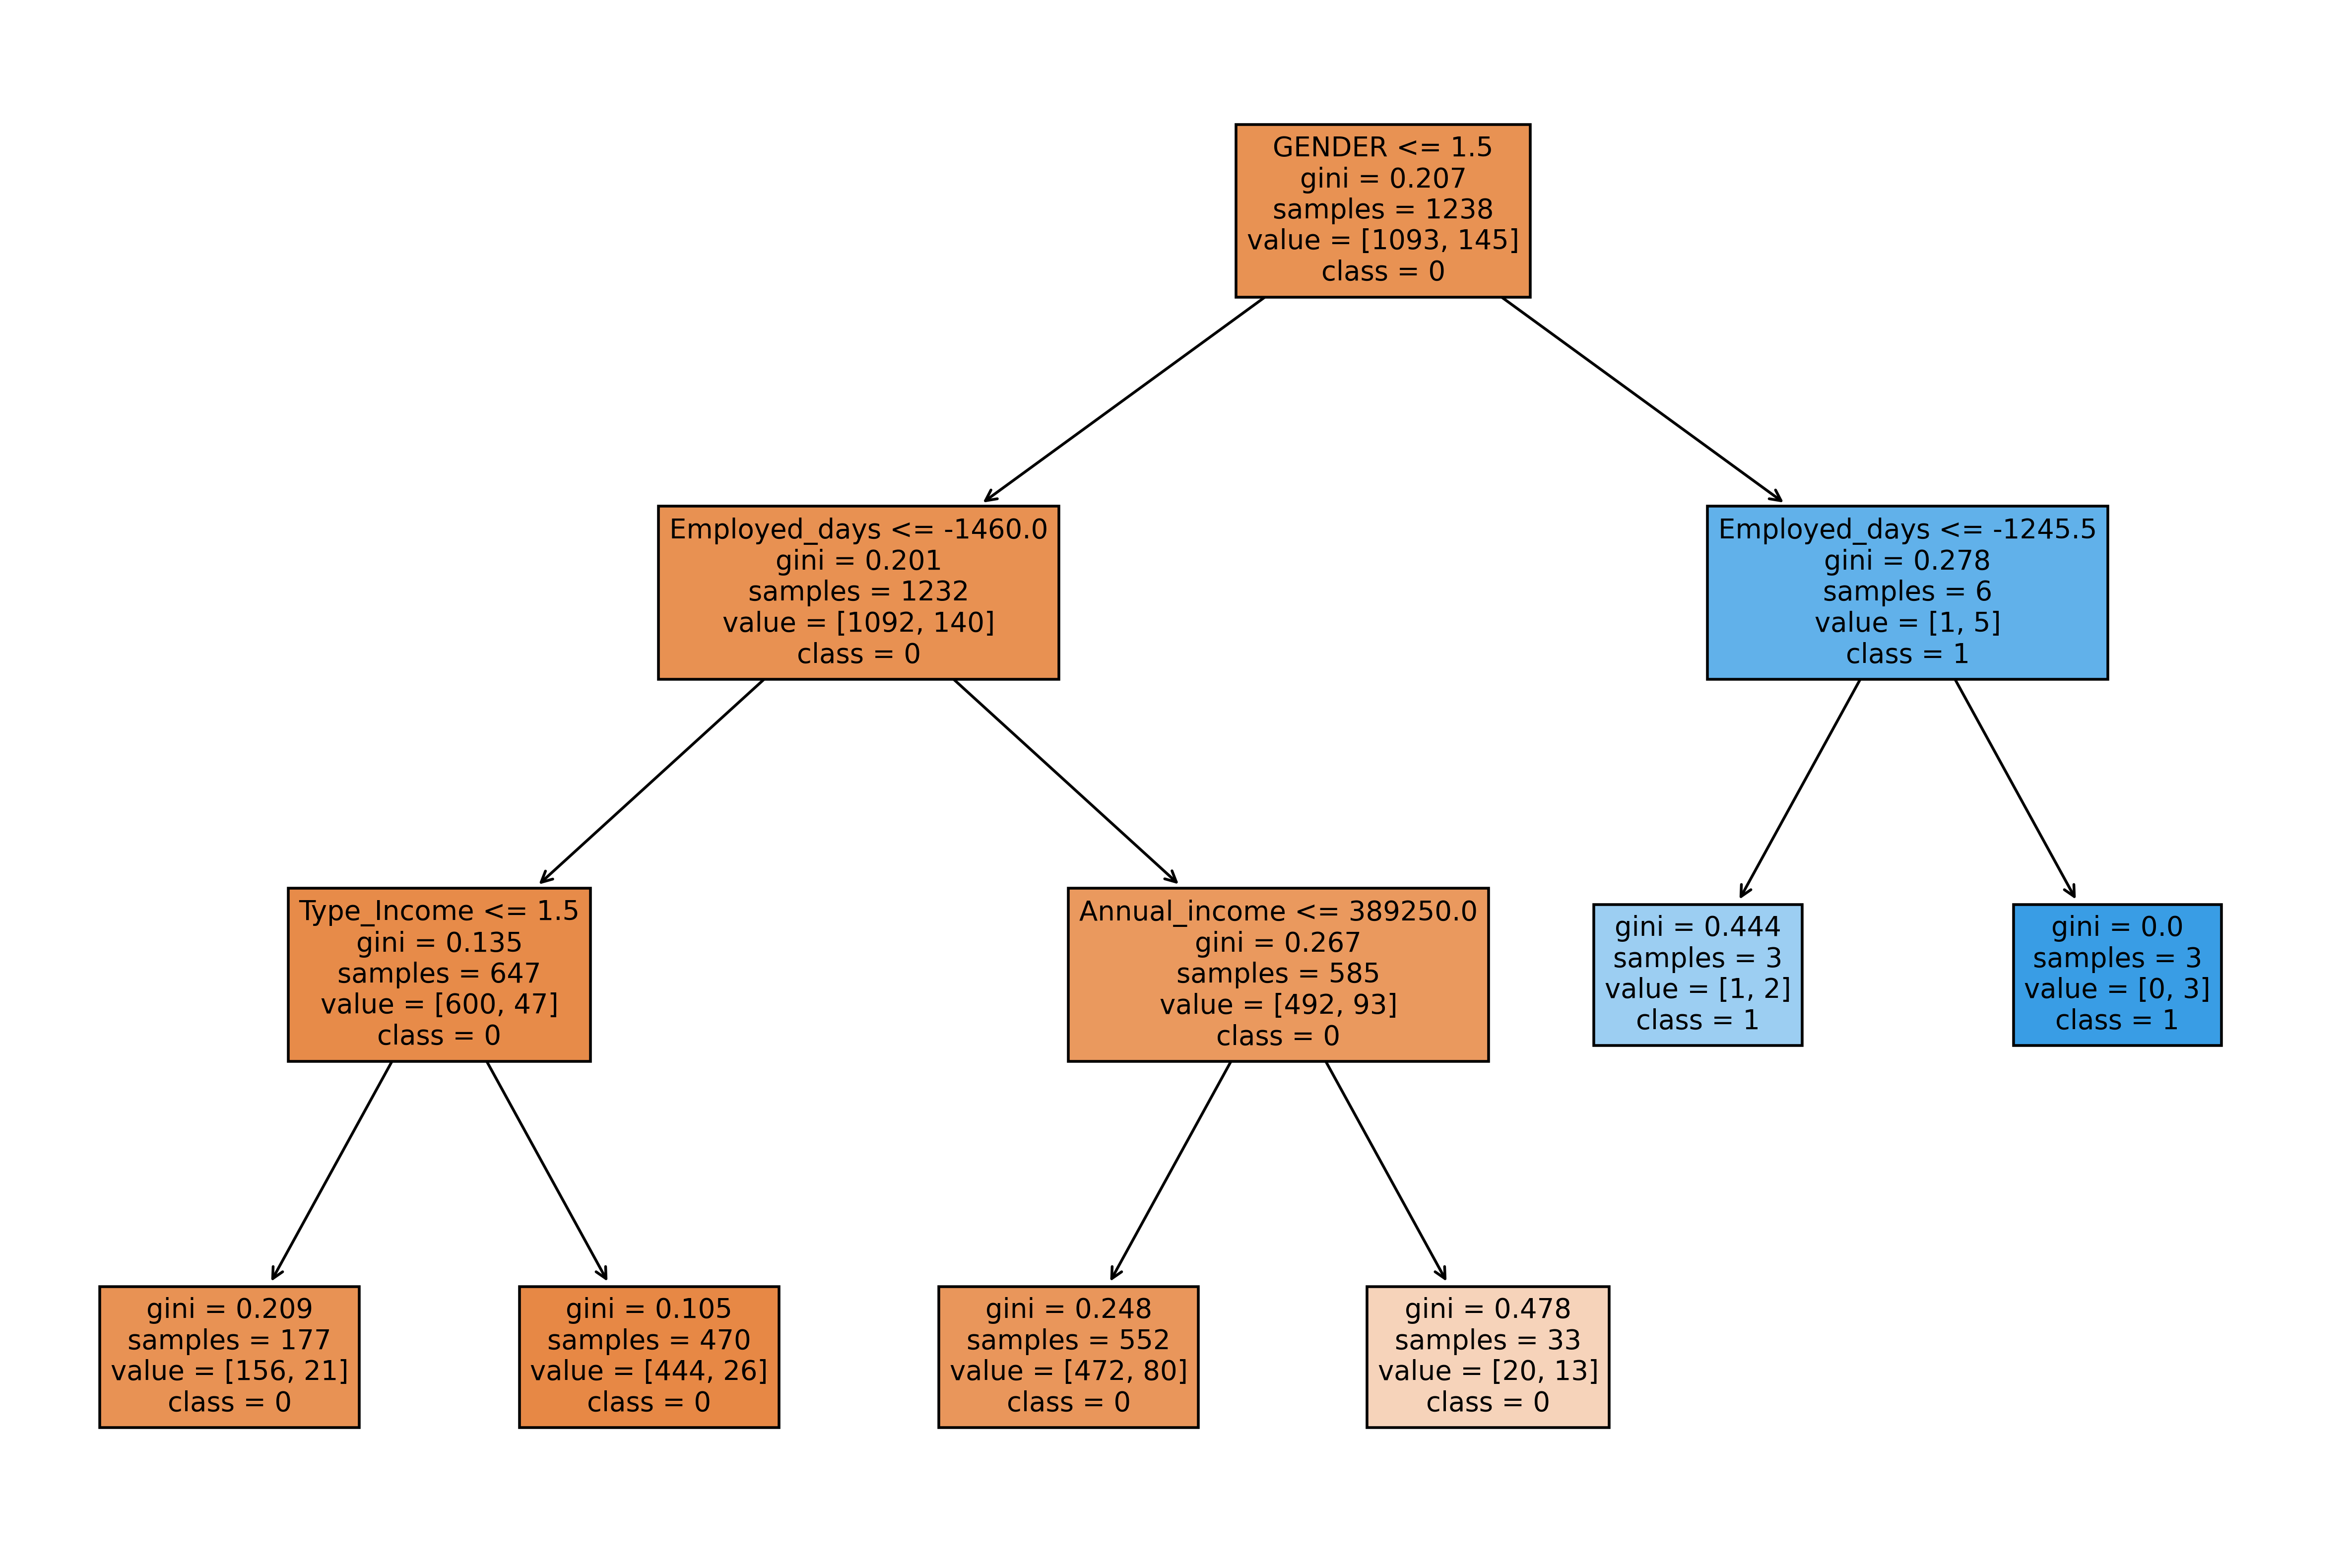

In [142]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from matplotlib import font_manager  # Import font_manager

font = font_manager.FontProperties(size=100)


# Print the learned tree with class names
plt.figure(figsize=(15, 10), dpi=400)
plot_tree(dt_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

The learned decision tree offers a clear understanding of how specific features contribute to the classification outcomes. Here are the main insights, elaborated in more detail:

1. **Importance of GENDER**:
   - The feature `GENDER` is the root node, indicating it is the most significant factor in the initial decision-making process. This suggests that gender plays a pivotal role in distinguishing between the classes in the dataset.

2. **Classification for GENDER ≤ 1.50**:
   - For individuals with `GENDER` less than or equal to 1.50, the tree further splits based on `Employed_days` (employment duration in days).
   - If `Employed_days` is less than or equal to -1460.00, another split occurs based on `Type_Income`.
     - Regardless of the `Type_Income` value (whether it is less than or greater than 1.50), the model predicts the class as 0. This indicates that within this subgroup, income type does not significantly affect the classification, and these individuals are predominantly classified into class 0.
   - If `Employed_days` is greater than -1460.00, the tree splits based on `Annual_income`.
     - Here too, irrespective of whether `Annual_income` is less than or greater than 389250.00, the predicted class remains 0. This consistency implies that for these individuals, higher or lower annual income does not alter the classification outcome.

3. **Classification for GENDER > 1.50**:
   - For individuals with `GENDER` greater than 1.50, the decision relies entirely on `Employed_days`.
   - If `Employed_days` is less than or equal to -1245.50, the model predicts the class as 1. Similarly, if `Employed_days` is greater than -1245.50, the class is also predicted as 1.
   - This pattern indicates a strong correlation between longer negative employment durations and classification into class 1 for this subgroup, suggesting that individuals with longer periods of unemployment or negative employment durations are likely to be classified into this category.

4. **General Insights**:
   - The decision tree highlights the primary influence of `GENDER` on classification decisions, with further refinements based on `Employed_days` and, to a lesser extent, `Type_Income` and `Annual_income`.
   - For the subgroup with `GENDER` ≤ 1.50, the consistent prediction of class 0, regardless of income type and annual income, suggests homogeneity in this group regarding the class label.
   - For the subgroup with `GENDER` > 1.50, employment duration significantly influences classification, indicating that job stability or tenure might be a crucial factor for this group.

Depth and Complexity: The tree was trained with a maximum depth of 5 to avoid overfitting. This ensures that the model is not overly complex, which helps in better generalization to unseen data. The tree's structure shows how it splits the data at each node based on different features to classify the credit card details.
→ Important Features: The features used for splitting at the top levels of the tree indicate their importance. Features such as Type_Income, Car_Owner, and GENDER appear prominently, showing they are significant in determining the target variable. For example, Type_Income_Pensioner might be a deciding factor in one of the top splits, indicating its strong influence on the classification.
→Decision Paths: Each path from the root to a leaf node represents a decision rule. For instance, if Type_Income_Pensioner is true and GENDER_Female is true, the path might lead to a high probability of a specific class. These rules can be interpreted to understand the decision-making process of the model.
→Predictive Patterns: The tree reveals patterns in the data that are predictive of the target variable. For example, owning a property or having a particular education level might consistently correlate with a higher or lower risk, as shown by the splits in the tree.
→Parameter Settings:
max_depth=5: This parameter limits the depth of the tree, ensuring that the model does not become too complex and helps in preventing overfitting.
random_state=42: This ensures reproducibility of the results by fixing the seed for random number generation.


The learned decision tree provides valuable insights into the factors influencing credit card holder classification. By examining the structure of the tree, we can discern the hierarchy of features and their importance in decision-making. Notably, certain attributes such as gender, type of income, car ownership, and occupation type emerge as significant predictors of creditworthiness. The decision paths from the root to the leaf nodes reveal the specific conditions under which individuals are classified into different credit risk categories. Moreover, the tree's interpretability allows for the extraction of clear and actionable rules, aiding in the understanding and validation of the model's predictions. By striking a balance between complexity and interpretability, the learned tree enables financial institutions to make informed decisions regarding credit assessment and risk management strategies, ultimately improving financial outcomes and customer satisfaction.




---


Do a single random train-test split (50:50) of the data. Train both a Naive Bayes Classifier and a Decision Tree classifier on TRAIN. In your report, explain and describe any settings for hyperparameters you used during the various trainings. Compute the ROC curves of the two classifiers on TEST, interpreting "label=1" as the positive class. Include plots of the ROC curves in your report,  together with a brief explanation of what they reveal.



#### Data Preprocessing
1. **Imputation of Missing Values**:
   - Missing values in the dataset `X` were handled using the `SimpleImputer` with the strategy set to 'mean'. This approach replaces any missing values with the mean value of the respective feature, ensuring a complete dataset for model training.
    

2. **Feature Scaling**:
   - To ensure compatibility with the Multinomial Naive Bayes classifier, all features were scaled to a non-negative range [0, 1] using the `MinMaxScaler`. This transformation helps in standardizing the input features and improves model performance.
    

#### Data Splitting
- The processed dataset was split into training and testing sets with a 50:50 ratio. This split was chosen to provide a balanced dataset for both training and evaluation, enhancing the reliability of performance metrics.


#### Training the Classifiers
1. **Multinomial Naive Bayes Classifier**:
   - We trained a `MultinomialNB` classifier, which is particularly suited for discrete feature data. This classifier assumes that features follow a multinomial distribution.
     

2. **Decision Tree Classifier**:
   - The `DecisionTreeClassifier` was trained with specific hyperparameters to control its complexity and prevent overfitting:
     - `max_depth=5`: Limits the depth of the tree to 5 levels.
     - `min_samples_split=10`: Requires at least 10 samples to split an internal node.
     - `min_samples_leaf=5`: Ensures that each leaf node has at least 5 samples.
     

#### Evaluation Metrics
The performance of the classifiers was assessed using ROC curves and AUC scores, which provide insights into the models' ability to distinguish between classes.

1. **Predicting Probabilities**:
   - For both classifiers, probabilities of the positive class were predicted on the test set:
   

2. **ROC Curve and AUC Score**:
   - The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The AUC (Area Under the Curve) score quantifies the overall ability of the classifier to discriminate between the positive and negative classes.


#### Summary
- The **Naive Bayes classifier** and the **Decision Tree classifier** were trained and evaluated on the same dataset.
- **Naive Bayes** showed an AUC score of (AUC_NB), indicating its ability to distinguish between classes.
- **Decision Tree** demonstrated an AUC score of (AUC_DT), reflecting its classification performance.
- The ROC curves provided a visual comparison of the classifiers, with the area under the curve indicating the overall performance.
- By comparing the AUC scores, We can determine that Naive Bayes classifier performs better than Decision Tree classifier

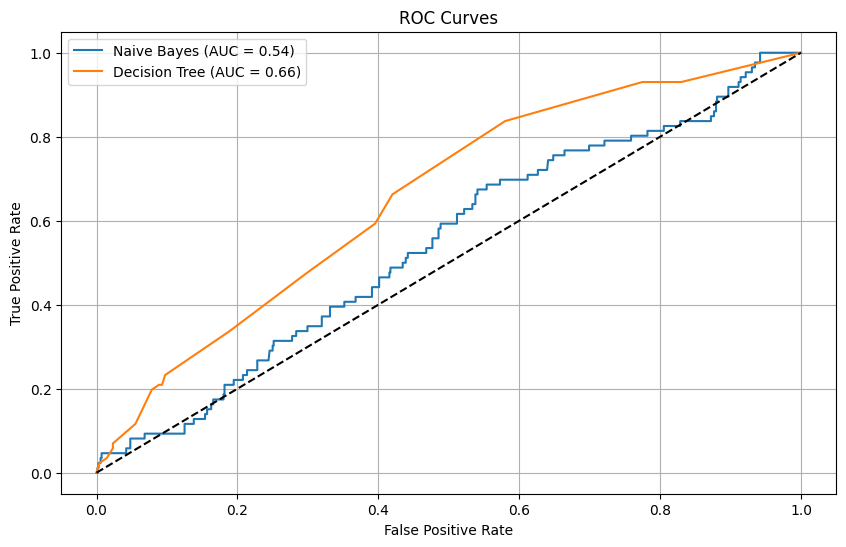

In [144]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split




# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


# Scale features to a non-negative range
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)


# Split the data into training and testing sets (50:50)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=30)

# Train Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt_classifier.fit(X_train, y_train)

# Predict probabilities for positive class
y_proba_nb = nb_classifier.predict_proba(X_test)[:, 1]
y_proba_dt = dt_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Naive Bayes Classifier
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
auc_nb = roc_auc_score(y_test, y_proba_nb)

# Compute ROC curve and AUC for Decision Tree Classifier
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()


### Insights of Naive Bayes and Decision Tree Models:

The graph comparing the accuracies of Gaussian Naive Bayes, Categorical Naive Bayes, and Decision Tree classifiers provides valuable insights into the performance of each model.

#### Comparison of Classifier Accuracies:
- The accuracies of the classifiers are visualized in the bar plot.
- **Gaussian Naive Bayes** achieved an accuracy of 0.903 .
- **Categorical Naive Bayes** achieved an accuracy of 0.89.
- **Decision Tree** achieved an accuracy of 0.9.

#### Insights:
- Among the three classifiers, **Gaussian Naive Bayes** attained the highest accuracy.
- This suggests that, based on the dataset and the problem at hand, Gaussian Naive Bayes is the most effective classifier in terms of accuracy.
- However, it's essential to consider other factors such as computational efficiency, interpretability of results, and the underlying assumptions of each model before making a final decision on model selection.
  
This insight provides valuable guidance for selecting the most suitable classifier for the task at hand, highlighting the strengths of Gaussian Naive Bayes in achieving high accuracy in this scenario.

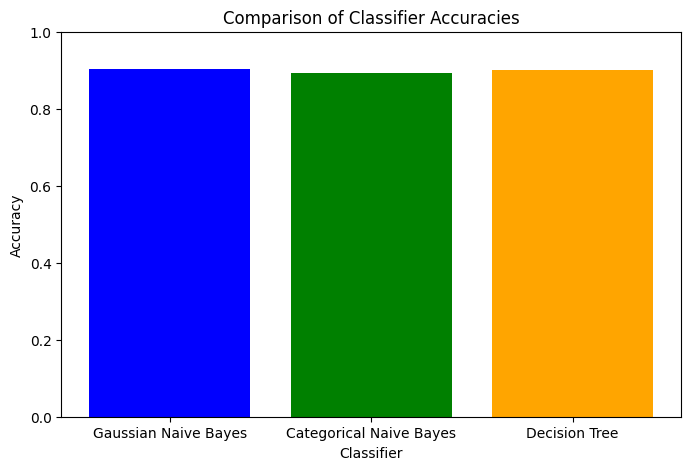

Insights of Naive Bayes and Decision Tree models:
Gaussian Naive Bayes achieves the highest accuracy.


In [145]:

# Plotting graph comparing accuracies
classifiers = ['Gaussian Naive Bayes', 'Categorical Naive Bayes', 'Decision Tree']
accuracies = [gnb_accuracy, accuracy_cnb, accuracy_dt]

plt.figure(figsize=(8, 5))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange'])
plt.title('Comparison of Classifier Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Insights
print("Insights of Naive Bayes and Decision Tree models:")
max_accuracy = max(accuracies)
max_classifier = classifiers[accuracies.index(max_accuracy)]
if max_classifier == 'Gaussian Naive Bayes':
    print("Gaussian Naive Bayes achieves the highest accuracy.")
elif max_classifier == 'Categorical Naive Bayes':
    print("Categorical Naive Bayes achieves the highest accuracy.")
else:
    print("Decision Tree achieves the highest accuracy.")
